In [2]:
import pandas as pd

In [4]:
data = pd.read_csv('adv2.csv', index_col=0)

In [5]:
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [6]:
data.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [9]:
type(data)

pandas.core.frame.DataFrame

In [10]:
import seaborn as sns

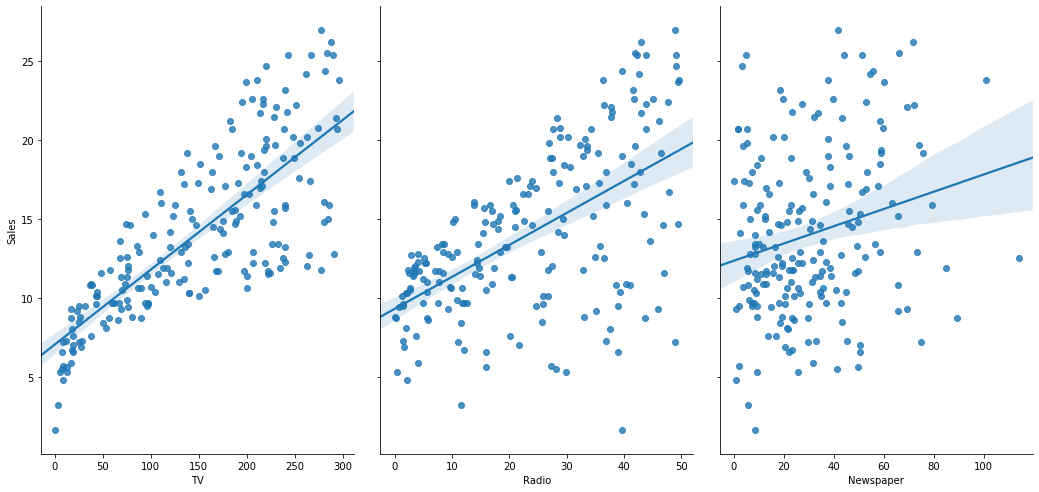

In [12]:
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=7, aspect=0.7, kind='reg')

# Training Linear Regression Model, Check Error

In [15]:
feature_cols = ['TV', 'Radio', 'Newspaper']

X=data[feature_cols]

X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [16]:
y = data['Sales']

In [17]:
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [21]:
print(X_train.shape)
print(X_test.shape)

(150, 3)
(50, 3)


In [22]:

# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
linreg.predict(X_test[:3])

array([21.70910292, 16.41055243,  7.60955058])

In [24]:
y_test[:3]

59    23.8
41    16.6
35     9.5
Name: Sales, dtype: float64

In [25]:
# evaluate by using sklearn.accuracy_score
y_pred = linreg.predict(X_test)

In [50]:
# mean absolute Error: mean of absolute value of errors
N, S = 0, 0

for i in range(len(y_test)):
    S += abs(y_pred[i]-y_test.array[i])
    N += 1
    
print('Mean Absolute Error MAE')
print('manual calculation:', S / N)

from sklearn import metrics

print('from module:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error MAE
manual calculation: 1.0668917082595208
from module: 1.0668917082595215


In [53]:
# mean squared Error: mean of the squared errors
N2, S2 = 0,0

for i in range(len(y_test)):
    err = y_pred[i]-y_test.array[i]
    S2 += pow(err,2)
    N2 += 1

print('Mean Squared Error')
print('manual calculation:', S2 / N2)

print('from module:', metrics.mean_squared_error(y_test, y_pred))

manual calculation: 1.9730456202283393
from module: 1.9730456202283397


In [54]:
# Root Mean Squared Error

RMSE = pow(S2/N2, 0.5)

print('Root Mean Squared Error')
print('manual calculation:', RMSE)

Root Mean Squared Error
manual calculation: 1.404651423032896


## give changes to X (feature_cols)

In [55]:
import numpy as np
from sklearn import metrics

def RMSE(y_test, y_pred):
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [56]:
# feature consisting of TV, Radio, Newspaper

feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
y = data.Sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

print('feature', feature_cols)
print('RMSE', RMSE(y_test, y_pred))

feature ['TV', 'Radio', 'Newspaper']
RMSE 1.404651423032896


In [57]:
# feature consisting of TV, Radio

feature_cols = ['TV', 'Radio']
X = data[feature_cols]
y = data.Sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

print('feature', feature_cols)
print('RMSE', RMSE(y_test, y_pred))

feature ['TV', 'Radio']
RMSE 1.3879034699382888
